## Project Title: Predicting Heart Disease Risk

PRESENTED BY: GETRUDE SHABIHA


In [9]:
# importing libraries
import pandas as pd
import numpy as np

In [10]:
# loading the dataset

dataset = pd.read_csv('MGH_PredictionDataSet.csv')

In [11]:
dataset.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# CLEANING

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [14]:
# View sum of nulls in each column
dataset.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [15]:
# Replace the nulls

# Categorical Data - Replace with Mode
dataset['education'].fillna(dataset['education'].mode()[0], inplace = True)
dataset['BPMeds'].fillna(dataset['BPMeds'].mode()[0], inplace = True)

# Continous Data - Replace with Mean
dataset['cigsPerDay'].fillna(dataset['cigsPerDay'].mean(), inplace = True)
dataset['totChol'].fillna(dataset['totChol'].mean(), inplace = True)
dataset['BMI'].fillna(dataset['BMI'].mean(), inplace = True)
dataset['heartRate'].fillna(dataset['heartRate'].mean(), inplace = True)
dataset['glucose'].fillna(dataset['glucose'].mean(), inplace = True)

In [16]:
# Remove duplicates
dataset = dataset.drop_duplicates()

In [17]:
# View sum of nulls in each column
dataset.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
# View the new shape after replacing nulls
dataset.shape

(4240, 16)

# EXPLORATORY DATA ANALYSIS (EDA)

This section helps us understand the structure of the data, identify patterns, anomalies, develop hypotheses, check assumptions, summarize statistics and display it graphically.

In [19]:
# Summary Statistics
dataset.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,9.005937,0.029245,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [20]:
# Correlation between variables
dataset.corr(numeric_only = True)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex,1.000000,-0.029014,0.013361,0.197026,0.316023,-0.051544,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081705,-0.116913,0.005718,0.088374
age,-0.029014,1.000000,-0.165283,-0.213662,-0.192534,0.121011,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.135578,-0.012839,0.116951,0.225408
education,0.013361,-0.165283,1.000000,0.019399,0.010217,-0.010231,-0.032910,-0.078565,-0.038215,-0.024025,-0.126062,-0.062334,-0.139731,-0.049580,-0.034416,-0.053002
currentSmoker,0.197026,-0.213662,0.019399,1.000000,0.767055,-0.048348,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167483,0.062678,-0.054062,0.019448
cigsPerDay,0.316023,-0.192534,0.010217,0.767055,1.000000,-0.045684,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.056473,-0.092888,0.075257,-0.056020,0.057646
BPMeds,-0.051544,0.121011,-0.010231,-0.048348,-0.045684,1.000000,0.114614,0.258580,0.051407,0.078775,0.251479,0.192254,0.099681,0.015136,0.048876,0.086448
prevalentStroke,-0.004550,0.057679,-0.032910,-0.032980,-0.032711,0.114614,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.024856,-0.017674,0.018065,0.061823
prevalentHyp,0.005853,0.306799,-0.078565,-0.103710,-0.066444,0.258580,0.074791,1.000000,0.077752,0.162683,0.696656,0.615840,0.300599,0.146777,0.082757,0.177458
diabetes,0.015693,0.101314,-0.038215,-0.044285,-0.037086,0.051407,0.006955,0.077752,1.000000,0.040161,0.111265,0.050260,0.086282,0.048986,0.605709,0.097344
totChol,-0.070064,0.260691,-0.024025,-0.046211,-0.026182,0.078775,0.000105,0.162683,0.040161,1.000000,0.207436,0.163423,0.115013,0.090678,0.044710,0.081807


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
heatmap_data = dataset.corr(numeric_only = True)

<Axes: >

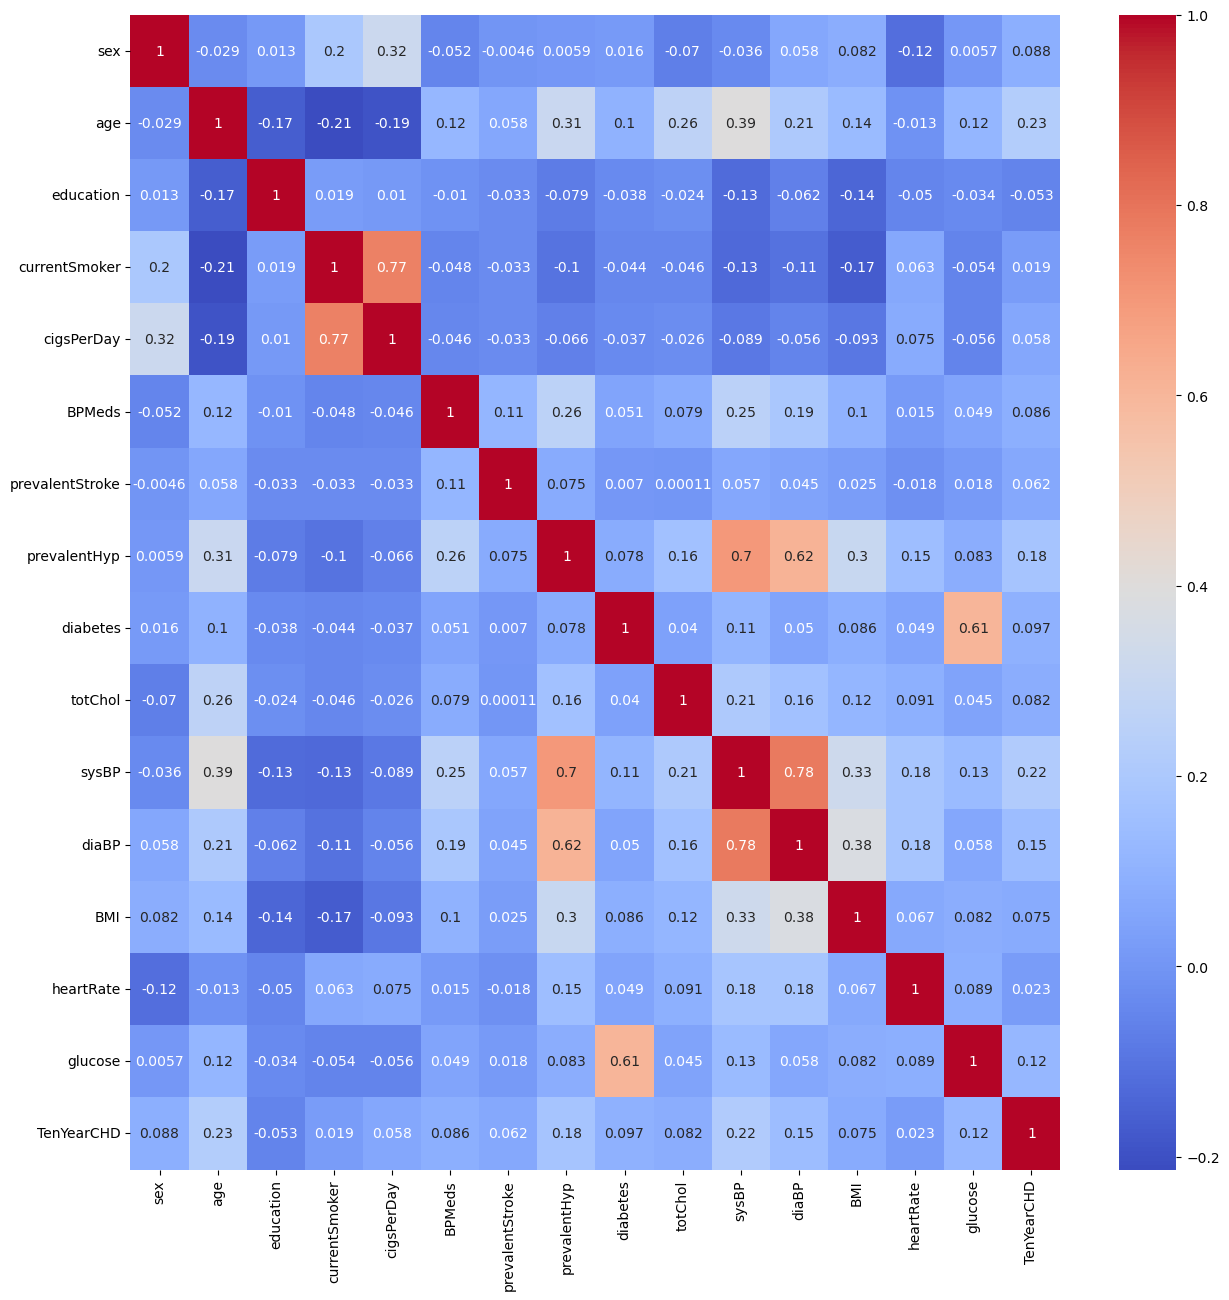

In [23]:
# Represent correlation matrix as a heatmap
fig, ax = plt.subplots(figsize =(15,15)) # this code adjusts the size of the heatmap
sns.heatmap(heatmap_data, annot = True,cmap = 'coolwarm')

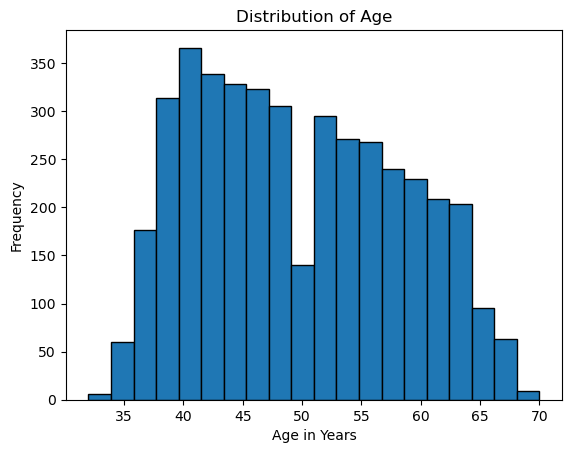

In [24]:
# Histogram Using Matplotlib
dataset['age'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age in Years')
plt.ylabel('Frequency')
plt.grid(False)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

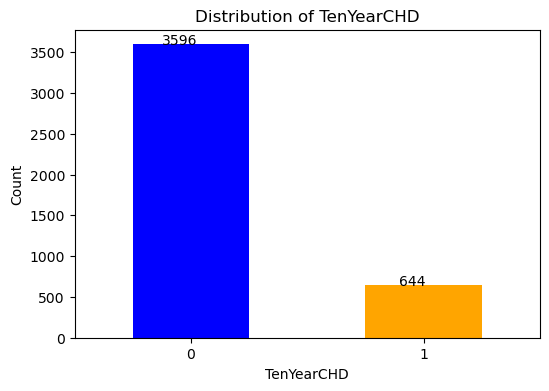

In [25]:
import matplotlib.pyplot as plt
# Counting the occurrences of each unique value in TenYearCHD
chd_counts = dataset['TenYearCHD'].value_counts()

# Plotting the distribution of TenYearCHD using a bar chart
plt.figure(figsize=(6, 4))
bars = chd_counts.plot(kind='bar', color=['blue', 'orange'])
# Adding count labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, bar.get_height() + 0.05, f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

plt.title('Distribution of TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.xticks(rotation=0)

<Figure size 800x600 with 0 Axes>

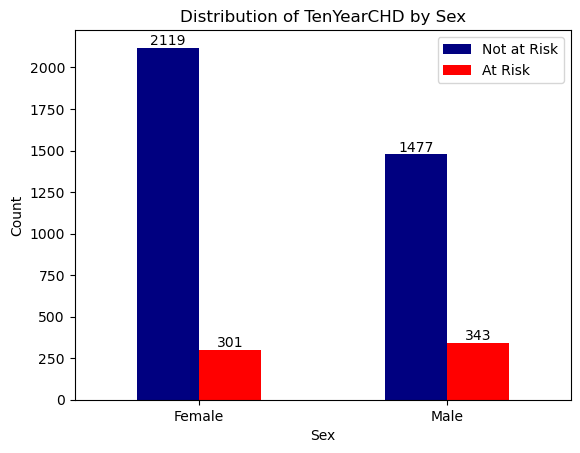

In [26]:
import matplotlib.pyplot as plt

# Counting occurrences of TenYearCHD for each sex
chd_by_sex = dataset.groupby(['sex', 'TenYearCHD']).size().unstack()

# Plotting the grouped bar chart
plt.figure(figsize=(8, 6))
ax = chd_by_sex.plot(kind='bar', stacked=False, color=['navy', 'red'])
plt.title('Distribution of TenYearCHD by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)  # Replace 0 and 1 with actual sex labels
plt.legend(['Not at Risk', 'At Risk'], loc='upper right')

# Displaying counts above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

<Figure size 1200x800 with 0 Axes>

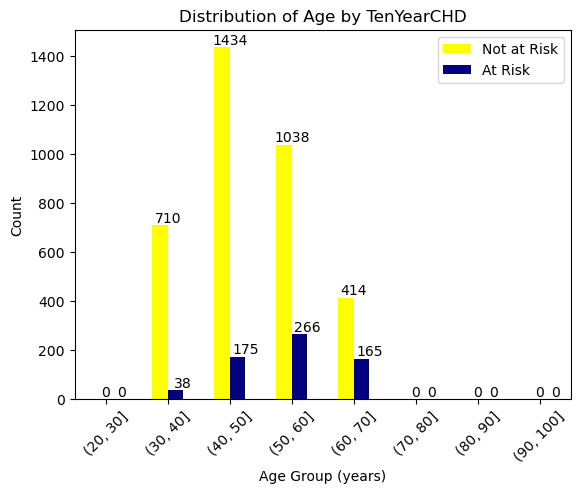

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Defining age brackets in 10-year intervals
age_bins = [i for i in range(20, 101, 10)]

# Creating age brackets and group by TenYearCHD
dataset['age_group'] = pd.cut(dataset['age'], bins=age_bins)
age_chd_counts = dataset.groupby(['age_group', 'TenYearCHD']).size().unstack()

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
ax = age_chd_counts.plot(kind='bar', stacked=False, color=['yellow', 'navy'])
plt.title('Distribution of Age by TenYearCHD')
plt.xlabel('Age Group (years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Not at Risk', 'At Risk'], loc='upper right')

# Displaying counts above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width(), p.get_height()), ha='center', va='bottom')


<Figure size 800x600 with 0 Axes>

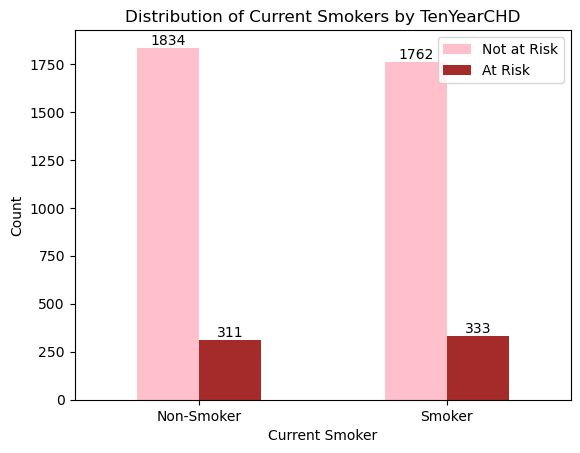

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by currentSmoker and TenYearCHD
smoker_chd_counts = dataset.groupby(['currentSmoker', 'TenYearCHD']).size().unstack()

# Plotting the grouped bar chart
plt.figure(figsize=(8, 6))
ax = smoker_chd_counts.plot(kind='bar', stacked=False,color=['pink', 'brown'])
plt.title('Distribution of Current Smokers by TenYearCHD')
plt.xlabel('Current Smoker')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'], rotation=0)
plt.legend(['Not at Risk', 'At Risk'], loc='upper right')

# Displaying counts above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


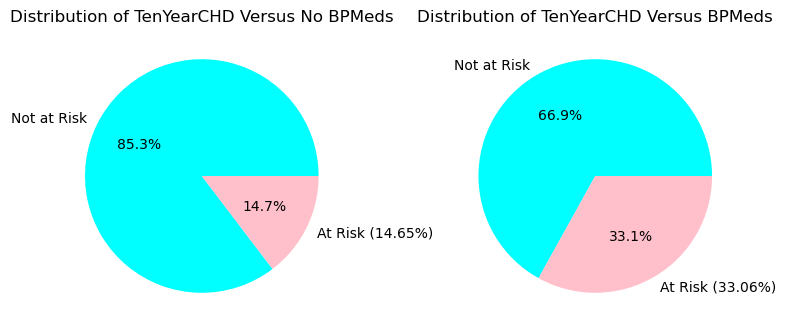

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by BPMeds and TenYearCHD
bpmeds_chd_counts = dataset.groupby(['BPMeds', 'TenYearCHD']).size().unstack()

# Calculating percentages
total_no_bpmeds = bpmeds_chd_counts.loc[0].sum()
total_bpmeds = bpmeds_chd_counts.loc[1].sum()

percentage_no_bpmeds_at_risk = (bpmeds_chd_counts.loc[0, 1] / total_no_bpmeds) * 100
percentage_bpmeds_at_risk = (bpmeds_chd_counts.loc[1, 1] / total_bpmeds) * 100

# Plotting pie chart for No BPMeds
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.pie(bpmeds_chd_counts.loc[0], labels=['Not at Risk', f'At Risk ({round(percentage_no_bpmeds_at_risk, 2)}%)'], autopct='%1.1f%%', colors=['cyan', 'pink'])
plt.title('Distribution of TenYearCHD Versus No BPMeds')

# Plotting pie chart for BPMeds
plt.subplot(1, 2, 2)
plt.pie(bpmeds_chd_counts.loc[1], labels=['Not at Risk', f'At Risk ({round(percentage_bpmeds_at_risk, 2)}%)'], autopct='%1.1f%%', colors=['cyan', 'pink'])
plt.title('Distribution of TenYearCHD Versus BPMeds')

plt.tight_layout()
plt.show()

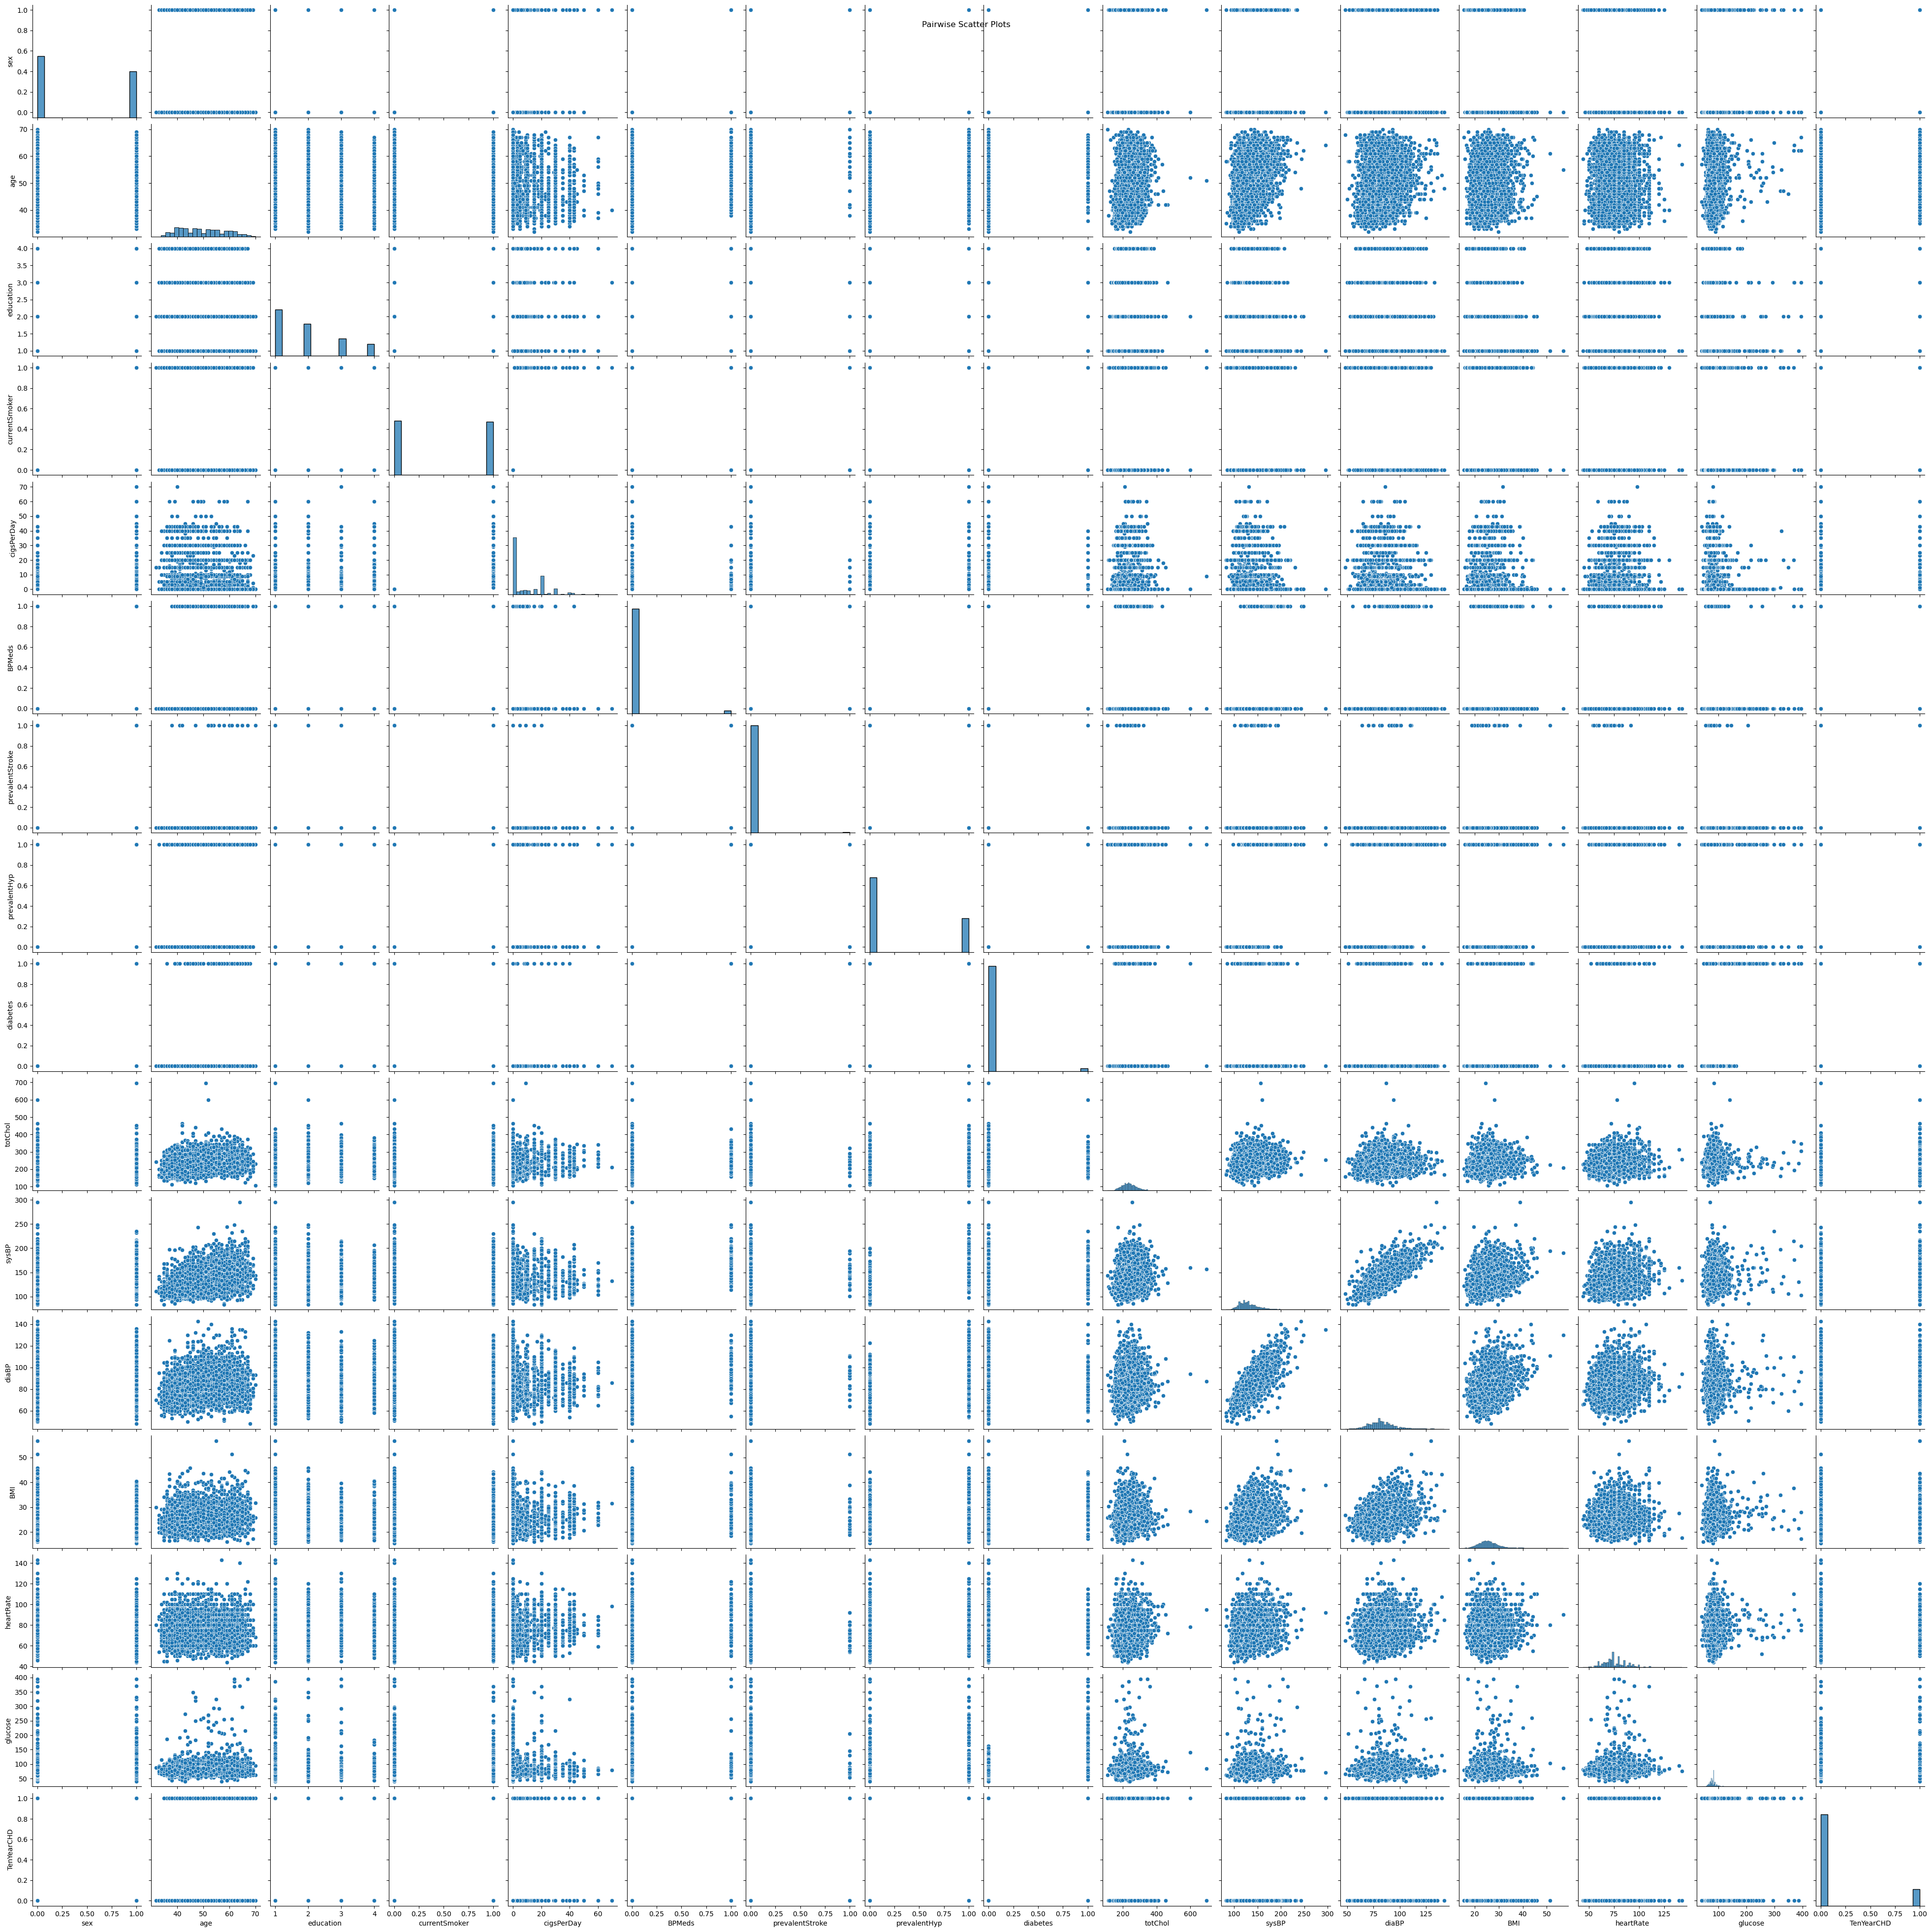

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical features for pairwise scatter plots
numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns

# Creating pairwise scatter plots
sns.pairplot(dataset[numerical_features])
plt.suptitle("Pairwise Scatter Plots")
plt.show()

# FEATURE SELECTION

In [31]:
dataset.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'age_group'],
      dtype='object')

In [32]:
# Select features from the columns and target
features = ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

In [33]:
features

['sex',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [34]:
X = dataset[features]

In [35]:
X.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [36]:
# identify the target denoted by y
target = ['TenYearCHD']

In [37]:
target

['TenYearCHD']

In [38]:
y = dataset[target]

In [39]:
y.head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


# SPLITTING THE DATASET

In [40]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% spolit)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
X_train.shape

(3392, 15)

In [42]:
y_train.shape

(3392, 1)

In [43]:
X_test.shape

(848, 15)

In [44]:
y_train.shape

(3392, 1)

# MODEL SELECTION AND TRAINING

### 1. Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Model
tree_model = DecisionTreeClassifier()

In [46]:
# Fitting the model with the training data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
accuracy_score = tree_model.score(X_test, y_test)
accuracy_score

0.7570754716981132

In [48]:
from sklearn.metrics import classification_report

# Predictions for Decision tree Regression
y_pred_lr = tree_model.predict(X_test)

# Classification Report for Logistic Regression
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))




Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       725
           1       0.19      0.21      0.20       123

    accuracy                           0.76       848
   macro avg       0.53      0.53      0.53       848
weighted avg       0.77      0.76      0.76       848



### 2. Logistic Regression

In [49]:
# This code ignores warnings
import warnings
warnings.filterwarnings('ignore')

In [50]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [51]:
# Fitting the model with the training data
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [52]:
accuracy_score = logistic_model.score(X_test, y_test)
accuracy_score

0.8573113207547169

In [53]:
from sklearn.metrics import classification_report

# Predictions for Logistic Regression
y_pred_lr = logistic_model.predict(X_test)

# Classification Report for Logistic Regression
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       725
           1       0.75      0.02      0.05       123

    accuracy                           0.86       848
   macro avg       0.80      0.51      0.49       848
weighted avg       0.84      0.86      0.80       848



### 3. K-Nearest Neighbours (KNN)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors =5)

In [55]:
# Fitting the model with the training data
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
accuracy_score = knn_model.score(X_test, y_test)
accuracy_score

0.8419811320754716

In [57]:
from sklearn.metrics import classification_report

# Predictions for knn model
y_pred_lr = knn_model.predict(X_test)

# Classification Report for Logistic Regression
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       725
           1       0.33      0.09      0.14       123

    accuracy                           0.84       848
   macro avg       0.60      0.53      0.53       848
weighted avg       0.79      0.84      0.80       848



### 4. Support Vector Machine (SVM)

In [58]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', probability=True)


In [59]:
# Fitting the model with training data
svm_model.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [60]:
accuracy_score = svm_model.score(X_test, y_test)
accuracy_score

0.8549528301886793

In [61]:
from sklearn.metrics import classification_report

# Predictions for svm model
y_pred_lr = svm_model.predict(X_test)

# Classification Report for Logistic Regression
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       725
           1       0.00      0.00      0.00       123

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848



### 5. Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [63]:
# Fitting the model with the training data
forest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [64]:
accuracy_score = forest_model.score(X_test, y_test)
accuracy_score

0.8549528301886793

In [65]:
from sklearn.metrics import classification_report

# Predictions for random forest
y_pred_lr = forest_model.predict(X_test)

# Classification Report for Logistic Regression
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.05      0.09       123

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.51       848
weighted avg       0.81      0.85      0.80       848



# PREDICTION

The best model chosen for this machine learning task is Logistic regression as it gives the highest accuracy score

In [66]:
features

['sex',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [67]:
# Define a sample list of feature values
random_features = [1,35,3,0,10,1,0,1,0,150,120,80,27,72,75]

In [68]:
# Convert the features into a dataframe
feature_df = pd.DataFrame([random_features])

In [69]:
# Prediction using the logistic regression model
prediction = logistic_model.predict(feature_df)

In [70]:
prediction

array([0], dtype=int64)

# Combined ROC_AUC graph

This graph assesses the model's ability to distinguish between binary classes. **Points above the diagonal line represents good classification. The more the model is skewed towards the upper left corner, the better the performance.**

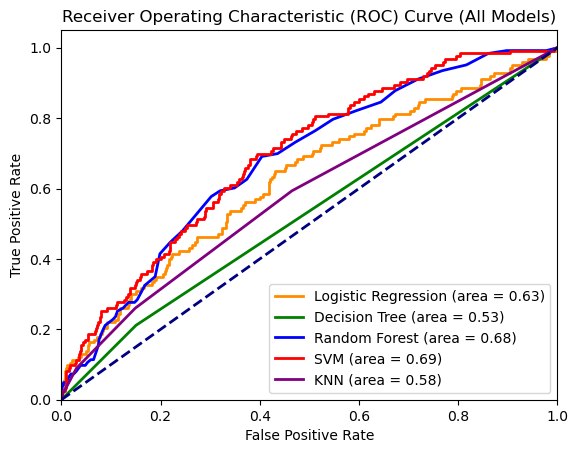

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#probabilities and labels for each model
y_prob_lr = logistic_model.predict_proba(X_test)[:, 1]
y_prob_dt = tree_model.predict_proba(X_test)[:, 1]
y_prob_rf = forest_model.predict_proba(X_test)[:, 1]
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]


#  Logistic Regression model ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

#Decision Tree model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Random Forest model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

#SVM model
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

#KNN model
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

# combined ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (All Models)')
plt.legend(loc="lower right")
plt.show()
